In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [34]:
df = pd.read_csv("insurance.csv")
print("Initial shape:", df.shape)


Initial shape: (1338, 7)


In [17]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [18]:
dups = df.duplicated().sum()
print("\nDuplicates found:", dups)
if dups > 0:
    df = df.drop_duplicates()
    print("New shape after removing duplicates:", df.shape)



Duplicates found: 1
New shape after removing duplicates: (1337, 7)


In [19]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[(df['charges'] >= lower) & (df['charges'] <= upper)]
print("Shape after removing extreme outliers:", df.shape)


Shape after removing extreme outliers: (1198, 7)


In [20]:
df['bmi'] = df['bmi'].clip(lower=15, upper=45)

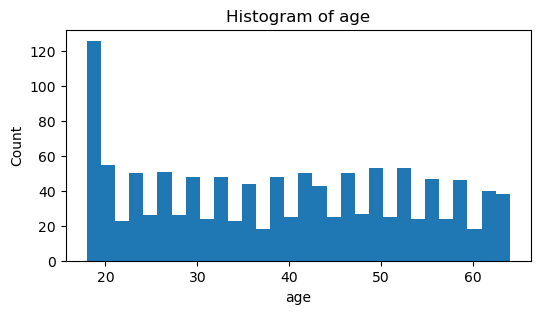

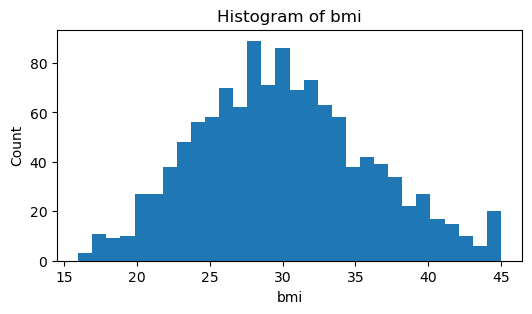

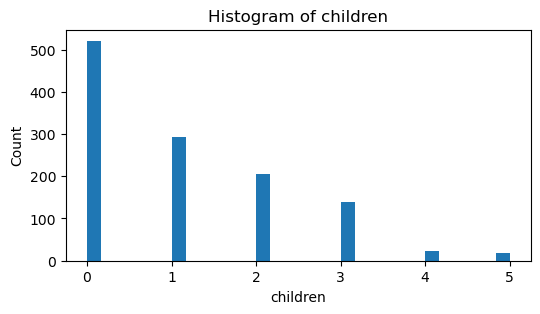

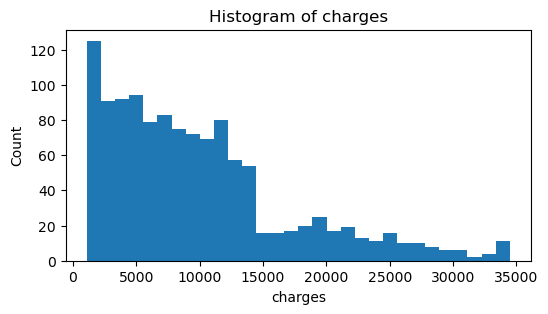

In [21]:
num_cols = ['age', 'bmi', 'children', 'charges']
for col in num_cols:
    plt.figure(figsize=(6,3))
    plt.hist(df[col], bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


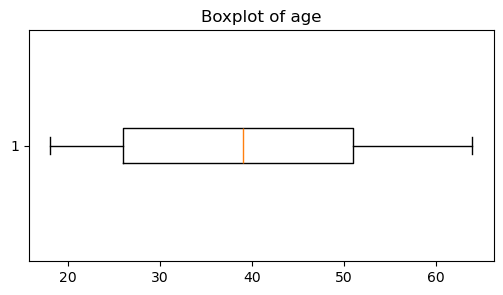

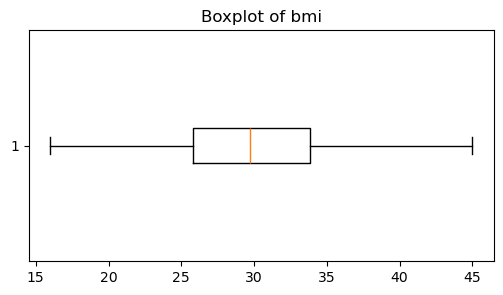

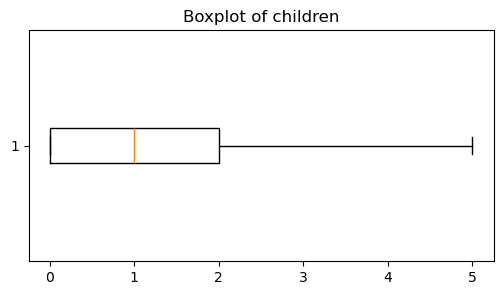

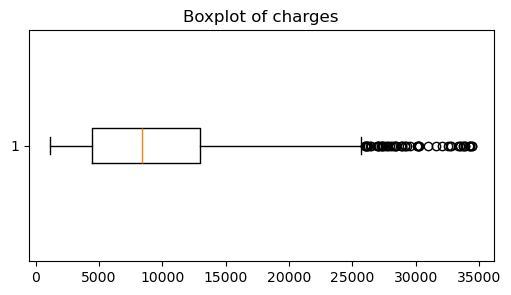

In [22]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    plt.boxplot(df[col], vert=False)
    plt.title(f"Boxplot of {col}")
    plt.show()

In [24]:
print("\nMean charges by smoker:\n", df.groupby('smoker')['charges'].mean())
print("\nMean charges by sex:\n", df.groupby('sex')['charges'].mean())
print("\nMean charges by region:\n", df.groupby('region')['charges'].mean())


Mean charges by smoker:
 smoker
no      8362.048001
yes    22014.245543
Name: charges, dtype: float64

Mean charges by sex:
 sex
female    10100.424469
male       9761.564831
Name: charges, dtype: float64

Mean charges by region:
 region
northeast    10736.262980
northwest    10392.290654
southeast     9574.280940
southwest     9021.451259
Name: charges, dtype: float64


In [25]:
df['sex'] = df['sex'].map({'male':0, 'female':1})
df['smoker'] = df['smoker'].map({'no':0, 'yes':1})
df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [27]:
X = df.drop('charges', axis=1)
y = df['charges']


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [29]:
scaler = StandardScaler()
num_feats = ['age','bmi','children']
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[num_feats] = scaler.fit_transform(X_train[num_feats])
X_test_scaled[num_feats] = scaler.transform(X_test[num_feats])

In [38]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("\n--- Linear Regression Results ---")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R² :", r2_score(y_test, y_pred_lr))


--- Linear Regression Results ---
MSE: 22887279.90749971
MAE: 2612.2600919256975
R² : 0.5745262452601666


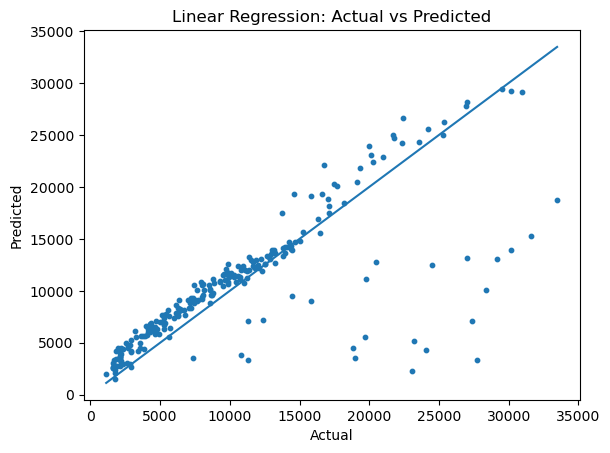

In [39]:
plt.scatter(y_test, y_pred_lr, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()
